<a href="https://colab.research.google.com/github/jprussoibanez/plant-seedlings-classification/blob/first-version-notebook/Plant_Seedlings_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTANT: Change BASE_DATASET_FOLDER to the root folder for dataset images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Change BASE_DATASET_FOLDER according to folder to find dataset
BASE_DATASET_FOLDER = "/content/drive/My Drive/Colab Notebooks/Tryolabs-CV-Interview/data/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# The project
The problem to analyze is the [Kaggle plant seedlings classification](https://www.kaggle.com/c/plant-seedlings-classification).

##  Competition goal
The goal is to differentiate a weed from a crop seedling in order to perform site-specific weed control.

## Dataset
The [database of images](https://arxiv.org/abs/1711.05458) has approximately 960 unique plants belonging to 12 species at several growth stages. It comprises annotated RGB images with a physical resolution of roughly 10 pixels per mm.

## Kernel structure
The following is a summary of the kernel main structure.

### 1. Kagglers solutions and discussions
- Review other kagglers kernels to better understand the challenges.
- Review the competition discussion forum for better understanding of the challenges and general discussions.
- Generate some insights and conclusions from the challenges and ideas to use in solving the problem.

### 2. Libraries and settings
- This section has all available settings to configure the training and model configuration.

### 3. Data analysis
- Main data exploration and analysis to determine the best model to solve the challenge.
- Use of descriptive analysis to determine dataset distribution.
- Use of t-SNE to reduce dimensionality for data visualization.

### 4. Pre-processing
- Use class weights to balance the dataset.
- Image segmentation to remove image soil background.
- Data augmentation to increase the dataset.

### 5. Processing
- Use of transfer learning with different pre-trained networks Resnet50 and InceptionV3. Other networks can be easily added.
- Use of custom simple CNN. This configuration can be improve by using hyperparameters optimization like [hyperopt](https://github.com/hyperopt/hyperopt).
- Use of a simple FNN as a classifier. This can be improved by using other classifiers like SVM, XGBoost, etc.

### 6. Generate prediction file
- Generate prediction file with Kaggle competition format.

# 1. Kagglers solutions and discussions
First step is to review the discussion forum and kernels from other kagglers in solving this competition to discover solutions and approaches to try and validate.

## Discussion forum
The following are the interesting discussions forum:
1. [Can Top People in the LeaderBoard share their apporoach?](https://www.kaggle.com/c/plant-seedlings-classification/discussion/53021). This links to [Kumar Sridhar Medium Post](https://medium.com/neuralspace/kaggle-1-winning-approach-for-image-classification-challenge-9c1188157a86) explaining how he reach the 5th position on the leaderboard.
2. [Plant Segmentation does not effect (that much) accuracy](https://www.kaggle.com/c/plant-seedlings-classification/discussion/45271). This discussion shows finally that segmentation do have an increase on acurracy [3-8]% and links to a [kernel](https://www.kaggle.com/gaborvecsei/plant-seedlings-fun-with-computer-vision) with the solution.
3. [Some Tips to Improve accuracy](https://www.kaggle.com/c/plant-seedlings-classification/discussion/46699). This a discussion on image size and pre-trained models to improve accuracy. The recommendation is to use image sizes between 300-400pxs and simple pre-trained models like ResNet or Inception. [Links](https://github.com/GodsDusk/Plant-Seedlings-Classification) to another solution from Kaggler positioned 47th on the leaderboard. Also explains how to use [pre-trained models with different input image sizes](https://stackoverflow.com/questions/44161967/keras-vggnet-pretrained-model-variable-sized-input). Another [discussion](https://www.kaggle.com/c/plant-seedlings-classification/discussion/45206) confirms better accuracy between 200-400pxs on image size.
4. [image background generalization](https://www.kaggle.com/c/plant-seedlings-classification/discussion/50323). This links to a kernel for [image segmentation and background removal](https://www.kaggle.com/ianchute/background-removal-cieluv-color-thresholding)
5. [Test images from the wild](https://www.kaggle.com/c/plant-seedlings-classification/discussion/44490). Author from the competition dataset shares the link to the [dataset webpage](https://vision.eng.au.dk/plant-seedlings-dataset/).

## Kagglers Kernels
The following are interesting sample kagglers kernels.
1. [Keras simple model (0.97103 Best Public Score)](https://www.kaggle.com/miklgr500/keras-simple-model-0-97103-best-public-score) This shows a simple custom deep network can achieve high scores.
2. [Seedlings - Pretrained keras models](https://www.kaggle.com/gaborfodor/seedlings-pretrained-keras-models). Kernel showing transfer learning with a Xception pre-trained model (around 83.6% accuracy).
3. [Plants PCA & t-SNE ( w/ image scatter plot)](https://www.kaggle.com/gaborvecsei/plants-t-sne) Nice data visualization with t-SNE.
4. [Plants Xception 90.06% Test Accuracy](https://www.kaggle.com/raoulma/plants-xception-90-06-test-accuracy). Kernel with transfer learning on Xception and different classification models with Logistic Regression, random forest and fully connect neural network.
5. [CNN + SVM + XGBoost](https://www.kaggle.com/matrixb/cnn-svm-xgboost) Combine other classifiers (SVM, XGBoost, Logistic regression, etc.) with the convolutional layers

## Conclusions
From the discussion forums and kernels we can conclude that:
1. There is good high scores with simple pre-trained models like Xception or ResNet (they recommend not to use more complex models like DenseNet or ResNext) and also on custom simple deep learning models. We should try both approaches for comparison and use it to benchmark our results. 
2. For the classification layer kagglers try different classifiers like XGBoost, SVM, Logistic Regression and Random Forest with different results. We should try some of this approaches to compare results.
3. Segmentation was shown to improve performance. As images are specially photograph for training purposes so it seems there is no need to crop by applying [bounding boxes](https://www.kaggle.com/martinpiotte/bounding-box-data-for-the-whale-flukes) like in this [whale competition](https://www.kaggle.com/c/humpback-whale-identification).
4. The datasets do have a small ammount of images and have imbalanced classes, so we should use data augmentation and other techniques to balance the dataset for better results.

All this assumptions will be validated through our own analyzes of the data and results.

# 2. Libraries and settings

## 2.1 Libraries

We will be using the following main libraries for coding:
1. [tensorflow](https://www.tensorflow.org/) with [keras](https://keras.io/) for managing the deep learning models.
2. [sckilit-learn](https://scikit-learn.org/), [numpy](https://numpy.org/), [pandas](https://pandas.pydata.org/) with [seaborn](https://seaborn.pydata.org/) for data manipulation, analysis and visualization.
3. [TQDM](https://github.com/tqdm/tqdm) for progress bar visualization on processing.
4. Some general libraries for environment management. [os](https://docs.python.org/3/library/os.html)

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd

# Keras
from keras.applications import vgg16, inception_v3, resnet50
from keras.optimizers import SGD, Adam
from keras.regularizers import l1, l2, l1_l2
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, GlobalAveragePooling2D, Input, Activation, BatchNormalization, GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler

import os

# Helpers
from tqdm import tqdm
from enum import Enum

# Image processing
import cv2

# Image plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils.class_weight import compute_class_weight

TensorFlow 2.x selected.


Using TensorFlow backend.


## 2.2 Global variables

This are the global variables use to setup the configuration for the models.

In [0]:
# Global settings
TRAIN_DATASET_FOLDER = os.path.join(BASE_DATASET_FOLDER, "train")
TEST_DATASET_FOLDER = os.path.join(BASE_DATASET_FOLDER, "test")
IMAGE_WIDTH = 299
IMAGE_HEIGHT = 299
IMAGE_CHANNELS = 3

TSNE_VISUALIZATION = True

# Data augmentation settings
rotation_range = 250      
zoom_range = 0.5         
width_shift_range = 0.5  
height_shift_range = 0.5 
horizontal_flip = True   
vertical_flip = True

# Training settings
batch_size = 30
epochs = 1
steps_per_epoch = 1
patience = 10

class TrainingNetwork(Enum):
    CUSTOM_CNN = 1    # Simple custom convolutional network with 3 layers
    RESNET_50 = 2     # Pre-trained Resnet50
    INCEPTION_V3 = 3  # Pre-trained InceptionV3

# Choose model to train
NETWORK_TO_TRAIN = TrainingNetwork.CUSTOM_CNN

# 3. Data analysis

The first and the most important task in solving a problem with Machine Learning is to analyze the dataset before proceeding with any algorithms. This is important in order to understand the complexity of the dataset which will eventually help in designing the algorithm.

## 3.1 Load data and images

The first step is to load the images and data from the datasets. For this we'll be using panda library and dataframes.

In [0]:
def get_species_groups():
    """ 
    Get the species group from the folders' name on the dataset. 
  
    @Returns: 
        array: Array of species groups to train.
    """
    return ['Loose Silky-bent', 
            'Shepherds Purse', 
            'Fat Hen', 
            'Charlock', 
            'Sugar beet', 
            'Maize', 
            'Common wheat', 
            'Cleavers', 
            'Black-grass', 
            'Small-flowered Cranesbill', 
            'Scentless Mayweed', 
            'Common Chickweed']

def read_train_data(species_groups):
    """ 
    Read the train species data from the datasets folder. 
  
    @Parameters:
        species_groups (array): Array of species groups to train.
  
    @Returns: 
        dataframe: Dataframe with the filepath, filename and species group category for each species image.
    """
    train = []
    for _, species in tqdm(enumerate(species_groups), total=len(species_groups)):
        for file in os.listdir(os.path.join(TRAIN_DATASET_FOLDER, species)):
            train.append([f'{TRAIN_DATASET_FOLDER}/{species}/{file}', file, species])
    
    train_df = pd.DataFrame(train, columns=['filepath', 'file', 'species'])
    
    return train_df

def read_image(image_file_path, image_width, image_height):
    """ 
    Read and transform image according to widht, height and channels.
  
    @Parameters:
        image_file_path(string): Image file path to read.
        image_width (int): Image width to resize.
        image_height (int): Image height to resize.
  
    @Returns: 
        array: Array of loaded images resized to image_width and image_height.
    """
    image = cv2.imread(image_file_path, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (image_width, image_height))
    
    return image

def load_images(filepaths, image_width, image_height, preprocess_function = lambda x: x):
    images =[]
    for filepath in tqdm(filepaths, total=len(filepaths)):
      images.append(preprocess_function(read_image(filepath, image_width, image_height)))

    return images
    
def load_species_images(species_data, image_width, image_height, preprocess_function = lambda x: x):
    """ 
    Load images to input features on neural network model and do one hot encode for labels.
  
    @Parameters:
        species_data (dataframe): Dataframe with the filepath, filename and species group category for each species image to load.
        image_width (int): Image width to resize.
        image_height (int): Image height to resize.
       
    @Returns: 
        species_X (array): Array of images on the data.
        species_Y (array): One hot encode for labels.
    """ 
    species_X = load_images(species_data['filepath'],image_width, image_height, preprocess_function)
    species_Y = pd.get_dummies(species_data['species'], drop_first = False)
    
    return np.stack(species_X), species_Y

def show_grid_multiple_sample(species_data, species_groups):
    """ 
    Plot sample images from each species group.
  
    @Parameters:
        species_data (dataframe): Dataframe with the filepath, filename and species group category for each species image to load.
        species_groups (array): Array with species group.
       
    @Returns: None
    Plots grid with number_of_samples images with image_size for each species_group
    """
    number_of_samples = 8
    image_size = 100
    
    number_of_species = len(species_groups) 
    fig, axes = plt.subplots(nrows = number_of_species, ncols = number_of_samples + 1, figsize = (20, 28), gridspec_kw = {'wspace': 0.05, 'hspace': 0})
 
    for species_id, species in enumerate(species_groups):
        samples_species_filepath = species_data[species_data['species'] == species]['filepath'].sample(number_of_samples)
        ax = axes[species_id, 0]
        ax.axis('off')
        ax.text(0.5, 0.5, species, horizontalalignment = 'center', verticalalignment = 'center', fontsize = 10, transform = ax.transAxes)
        for sample_id, sample_species_filepath in enumerate(samples_species_filepath):
            image = read_image(sample_species_filepath, image_size, image_size)
            ax = axes[species_id, sample_id + 1]
            ax.axis('off')
            ax.imshow(image)
            
    plt.show()

def show_grid_one_sample(species_data, species_groups):
    """ 
    Plot one sample image from each species group.
  
    @Parameters:
        species_data (dataframe): Dataframe with the filepath, filename and species group category for each species image to load.
        species_groups (array): Array with species group.
       
    @Returns: None
    Plots one sample image with image_size for each species_group
    """
    image_size = 100
    number_of_species = len(species_groups)
    
    fig, axes = plt.subplots(nrows = 2, ncols = int(number_of_species / 2), figsize = (20, 8), gridspec_kw = {'wspace': 0.05, 'hspace': 0.05})
    axes = axes.flatten()
    
    for group_id, (group_name, group) in enumerate(species_data.groupby('species')):
        image = read_image(group.sample(1).iloc[0]['filepath'], image_size, image_size)
        axes[group_id].axis('off')
        axes[group_id].set_title(group_name)
        axes[group_id].imshow(image)
            
    plt.show()
    
def show_species_distribution(species_data):
    """ 
    Plot species distribution.
  
    @Parameters:
        species_data (dataframe): Dataframe with the filepath, filename and species group category for each species image to load.
       
    @Returns: None
    Plots species distribution on an histogram and pie chart.
    """
    species_groups = species_data['species'].unique()
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    colors_palette = sns.husl_palette(len(species_groups), h = 0.01, l = 0.6, s = .2)
    explode_chart = np.full(len(species_groups), 0.1)
    
    species_data.groupby('species').size().plot.bar(
        subplots = True, ax = axes[0], stacked = True, title = 'Species distribution', label = "", color = colors_palette
    )
     
    species_data['species'].value_counts().plot.pie(
        subplots = True, ax = axes[1], autopct = '%.2f', title = 'Species distribution', label = "", colors = colors_palette, explode = explode_chart
    )
    
    plt.show()
    
class TSNE_dimension(Enum):
    TWO = 1
    THREE = 2
    
def apply_PCA(images, n_components = 100):
    pca = PCA(n_components = n_components)
    pca_result = pca.fit_transform(images)
    
    return pca_result

def apply_TSNE(images, n_components = 2, perplexity = 100):
    tsne = TSNE(n_components = n_components, perplexity = perplexity)
    tsne_result = tsne.fit_transform(images)
    
    return tsne_result

def plot_TSNE_with_PCA(images, image_labels, dimension = TSNE_dimension.TWO):
    pca_results = apply_PCA(images)
    n_components = (2 if dimension == TSNE_dimension.TWO else 3)
    tsne_result = apply_TSNE(pca_results, n_components)
    plot_TSNE_results(tsne_result, image_labels, dimension = TSNE_dimension.TWO)

def plot_TSNE_results(tsne_result, image_labels, dimension = TSNE_dimension.TWO):
    df = pd.DataFrame(tsne_result).assign(label = image_labels)
    plt.figure(figsize=(10,10))
    if dimension == TSNE_dimension.TWO:
        sns.scatterplot(x = 0, y = 1, hue = 'label', data = df);
    else:
        fig = px.scatter_3d(df, x = 0, y = 1, z = 2, color = 'label')
        fig.show();

### 3.1.1 Load data

Load data from the datasets folders.

In [5]:
species_groups = get_species_groups()
print(f"This are the groups to be loaded and trained: {species_groups}")

This are the groups to be loaded and trained: ['Loose Silky-bent', 'Shepherds Purse', 'Fat Hen', 'Charlock', 'Sugar beet', 'Maize', 'Common wheat', 'Cleavers', 'Black-grass', 'Small-flowered Cranesbill', 'Scentless Mayweed', 'Common Chickweed']


In [6]:
all_train_df = read_train_data(species_groups)
all_train_df.sample(4)

100%|██████████| 12/12 [00:09<00:00,  1.78s/it]


filepath  ...                    species
181   /content/drive/My Drive/Colab Notebooks/Tryola...  ...           Loose Silky-bent
3448  /content/drive/My Drive/Colab Notebooks/Tryola...  ...  Small-flowered Cranesbill
2769  /content/drive/My Drive/Colab Notebooks/Tryola...  ...                   Cleavers
4244  /content/drive/My Drive/Colab Notebooks/Tryola...  ...           Common Chickweed

[4 rows x 3 columns]

### 3.1.2 Descriptive analysis

We will do a descriptive analysis on the load data as followed:
1. Show sample images by species group.
2. Show species group distribution.
3. Dimensionality reduction through PCA & t-SNE.

#### 3.1.2.1 Sample images by species group

We can see that it even difficult for an inexperienced human eye to distinguish between the different weeds species groups.

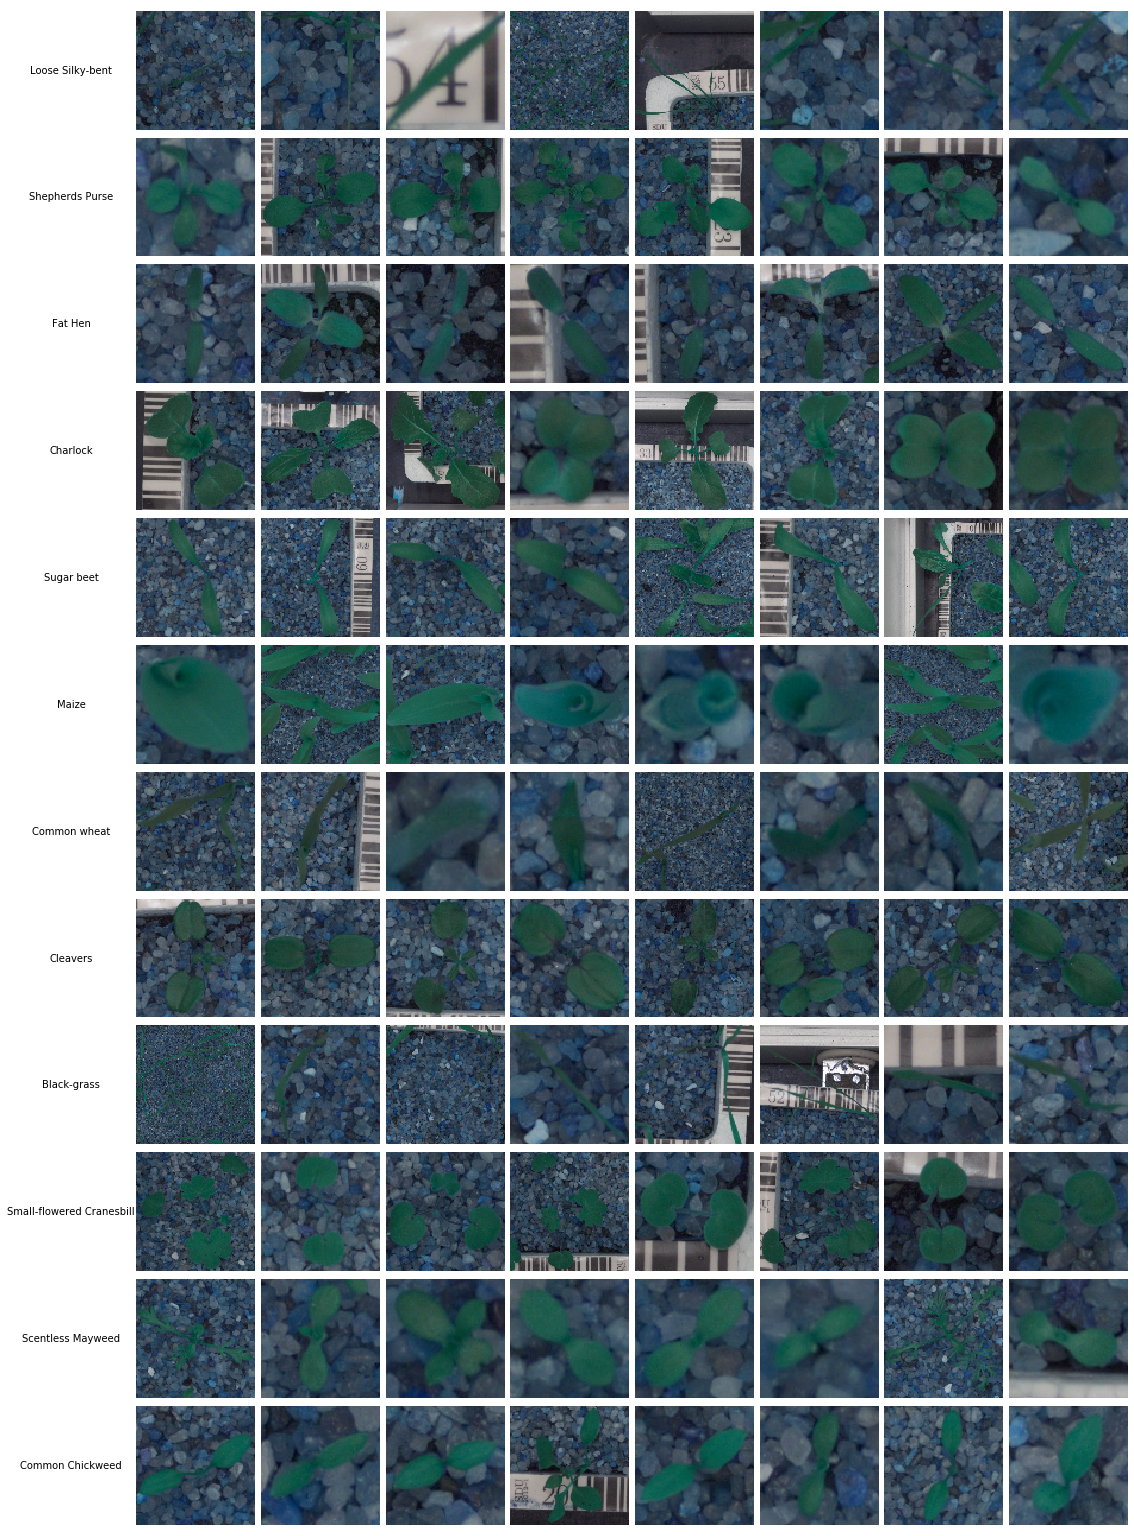

In [7]:
show_grid_multiple_sample(all_train_df, species_groups)

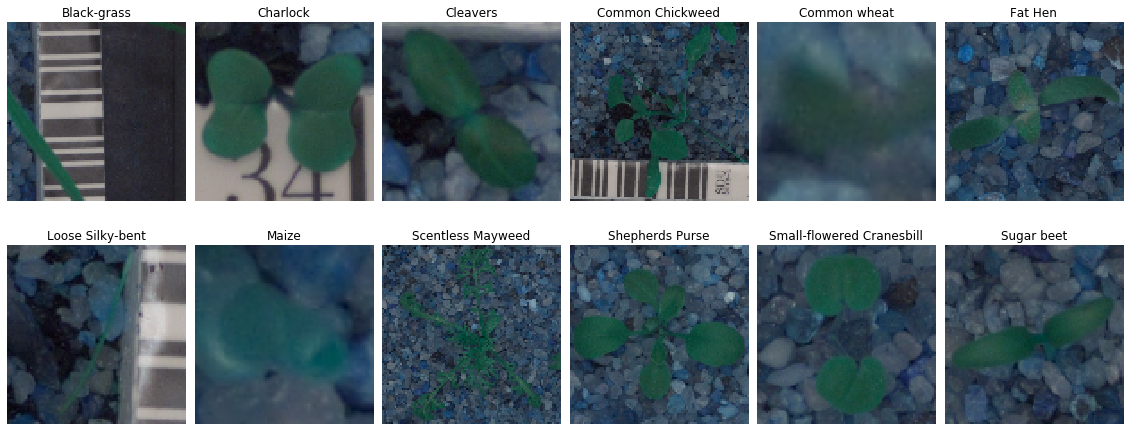

In [8]:
show_grid_one_sample(all_train_df, species_groups)

#### 3.1.2.2 Species group distribution

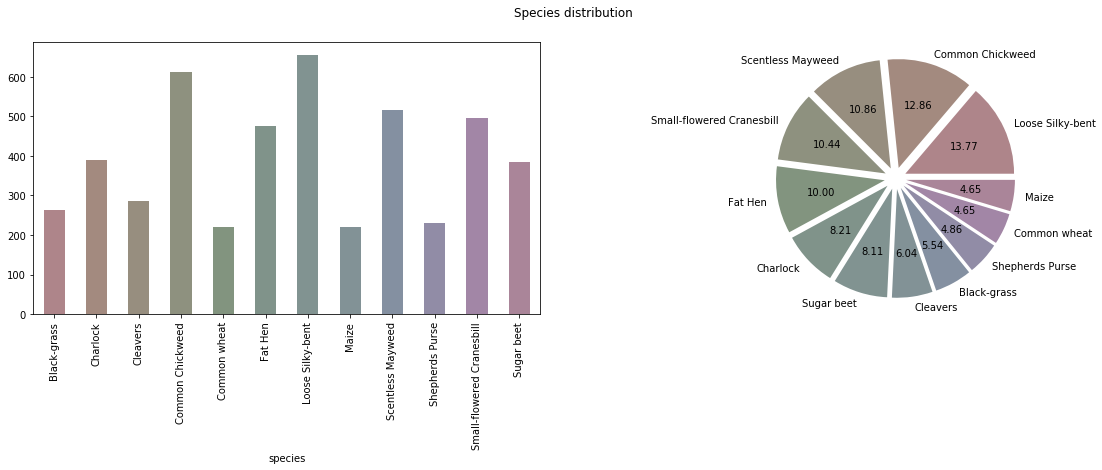

In [9]:
show_species_distribution(all_train_df)

#### 3.1.2.3 PCA & TSNE

The PCA and t-SNE can be applied for dimensionality reduction to images on 2D and 3D. There seems not much clustering relationship on lower dimensions (at least before applying the pre-processing like segmentation).

NOTE: The number of sample images are reduced to 500 images to avoid long loading times.

In [10]:
if TSNE_VISUALIZATION:
    sample_df = all_train_df.sample(500)
    sample_images, _ = load_species_images(sample_df, IMAGE_WIDTH, IMAGE_HEIGHT)

100%|██████████| 500/500 [05:31<00:00,  1.03s/it]


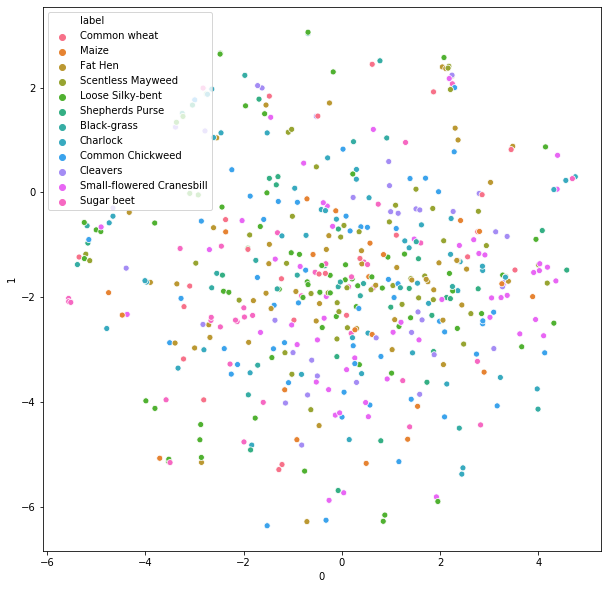

In [11]:
if TSNE_VISUALIZATION:
    flatten_images = [image.flatten() for image in sample_images]
    pca_results = apply_PCA(flatten_images)
    tsne_results = apply_TSNE(pca_results)
    plot_TSNE_results(tsne_results, sample_df['species'].values)

In [12]:
if TSNE_VISUALIZATION:
    tsne_results = apply_TSNE(pca_results, n_components = 3)
    plot_TSNE_results(tsne_results, sample_df['species'].values, TSNE_dimension.THREE)

<Figure size 720x720 with 0 Axes>

## 3.2 Conclusions

From the descriptive analysis some conclusions are:
- There is an imbalance on the dataset which we should handle to avoid biases.
- There is not much images for training on deep learning models so we should use data augmentation.
- All weeds images have a common soil background that we should remove to improve weed recognition.
- There is no clear clustering on dimensionality reduction yet before pre-processing.

# 4. Pre-processing

This are the principal concerns that should be addressed on the pre-processing of the data derived from the data analysis:

1. Balance the dataset to avoid biases on imbalance weed types.
2. Use image segmentation to remove soil background to focus on weed recognition.
3. Use data augmentation to increase the data available for training.

## 4.1 Balance dataset


In [0]:
def compute_class_weights(data_groups) :
    return dict(enumerate(compute_class_weight("balanced", np.unique(data_groups), data_groups)))

In [14]:
class_weights = compute_class_weights(all_train_df['species'])
print(f"This are the class weights that will be use for training in order to balance the dataset: {class_weights}")

This are the class weights that will be use for training to balance the dataset: {0: 1.5050697084917617, 1: 1.014957264957265, 2: 1.3792102206736354, 3: 0.6478450627386798, 4: 1.7911010558069382, 5: 0.8333333333333334, 6: 0.605249745158002, 7: 1.7911010558069382, 8: 0.7671188630490956, 9: 1.7135642135642135, 10: 0.7980510752688172, 11: 1.0281385281385282}


## 4.2 Segmentation
The image segmentation allows to remove the background and focus on the principal object (weed) of analysis.

In this section we apply the segmentation operation to a sample image with the following steps:

1. Create the mask 
  1. Change the color space to HSV. This is an easier space to define color ranges.
  2. Define the color range for green (color for the weed).
  3. Define the most common shape for weeds, in this case ellipses.
  4. Apply the morphology transformation to find the weeds with color green and close ellipses approximations. 
2. Apply mask to remove the background

Further information can be found on openCV documentation on [colorspaces](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html) and [Morphological Transformations](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html)

In [0]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def create_image_tranformation(image):
    masked_image = create_mask_for_plant(image)
    segmented_image = segment_plant(image)
    
    return masked_image, segmented_image

def load_species_images_with_segmentation(species_data, image_width, image_height):
    return load_species_images(species_data, image_width, image_height, segment_plant)

def plot_image_transformation(original_image, masked_image, segmented_image):
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 10))
    axs[0].imshow(original_image)
    axs[0].set_title('Original image')
    axs[0].axis('off')
    axs[1].imshow(masked_image)
    axs[1].axis('off')
    axs[1].set_title('Masked image')
    axs[2].imshow(segmented_image)
    axs[2].set_title('Segmented image')
    axs[2].axis('off')

100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


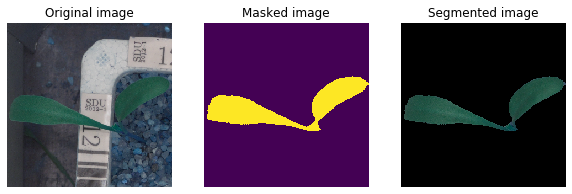

In [16]:
sample_image, _ = load_species_images(all_train_df.sample(1), IMAGE_WIDTH, IMAGE_HEIGHT)
masked_image, segmented_image = create_image_tranformation(sample_image[0])
plot_image_transformation(sample_image[0], masked_image, segmented_image)

Applying t-SNE again on the same sample images but now with segmentation.

100%|██████████| 500/500 [00:05<00:00, 87.26it/s]


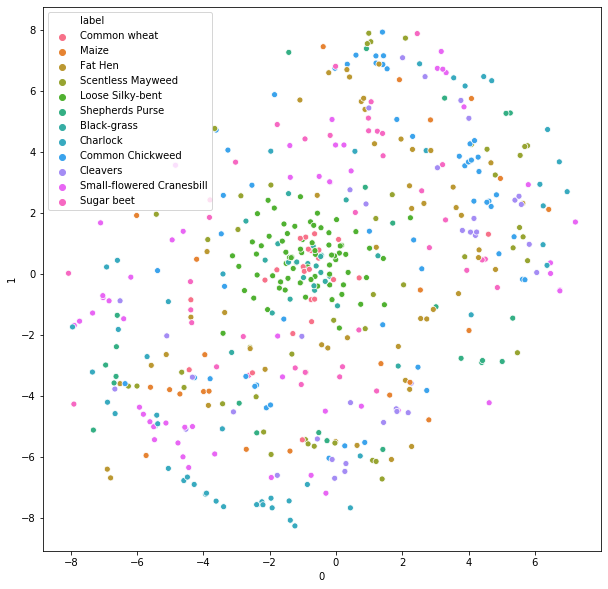

In [17]:
if TSNE_VISUALIZATION:
    sample_images, _ = load_species_images_with_segmentation(sample_df, IMAGE_WIDTH, IMAGE_HEIGHT)
    flatten_images = [image.flatten() for image in sample_images]
    plot_TSNE_with_PCA(flatten_images, sample_df['species'].values, TSNE_dimension.TWO)

## 4.2 Data augmentation

For the data augmentation we can use keras preprocessing library [ImageDataGenerator](https://keras.io/preprocessing/image/).

The class can generate batches of tensor image data with real-time data augmentation while training the model. This are the transformations apply to augment the data:
- Random rotations within a range define by rotation_range.
- Random zooms within a range define by zoom_range.
- Random width shifts define by width_shift_range.
- Random heigh shifts define by height_shift_range.
- Random horizontal flips.
- Random vertical flips.

All this variables can be configure at the beginning of the notebook.

This section will show random transformations on some sample images.

In [0]:
def create_image_data_generator(
    rotation_range,  
    zoom_range,
    width_shift_range, 
    height_shift_range, 
    horizontal_flip,
    vertical_flip
):
    return ImageDataGenerator(
        featurewise_center = False,
        samplewise_center = False,
        featurewise_std_normalization = False,
        samplewise_std_normalization = False,
        zca_whitening = False,
        rotation_range = rotation_range,
        zoom_range = zoom_range,
        width_shift_range = width_shift_range,
        height_shift_range = height_shift_range,
        horizontal_flip = horizontal_flip,
        vertical_flip = vertical_flip,
        rescale = (1 / 255)
    )
    
def show_augmentation_row(original_image, images_iterator, number_of_augmentations, axes):   
    axes[0].axis('off')
    axes[0].set_title('Original image')
    axes[0].imshow(original_image)
    
    for image_number in range(number_of_augmentations):
        image = images_iterator.next()
        axes[image_number + 1].axis('off')
        axes[image_number + 1].set_title('Augmented image')
        axes[image_number + 1].imshow(image[0], vmin=0, vmax=1)

def show_grid_with_augmented_images(number_of_samples, number_of_augmentations, image_data_generator):   
    fig, axes = plt.subplots(nrows = number_of_samples, ncols = number_of_augmentations + 1, figsize = (30, 4 * number_of_samples), gridspec_kw = {'wspace': 0.05, 'hspace': 0.05})
    fig.suptitle('Sample augmented images', fontsize=16)
    
    sample_images, _ = load_species_images_with_segmentation(all_train_df.sample(number_of_samples), IMAGE_WIDTH, IMAGE_HEIGHT)
    for sample_id, sample_image in enumerate(sample_images):
        images_iterator = image_data_generator.flow(np.expand_dims(sample_image, axis=0), None, 1)
        show_augmentation_row(sample_image, images_iterator, number_of_augmentations, axes[sample_id])
    
    plt.show()

In [0]:
image_data_generator = create_image_data_generator(
    rotation_range = 250,    
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
)

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


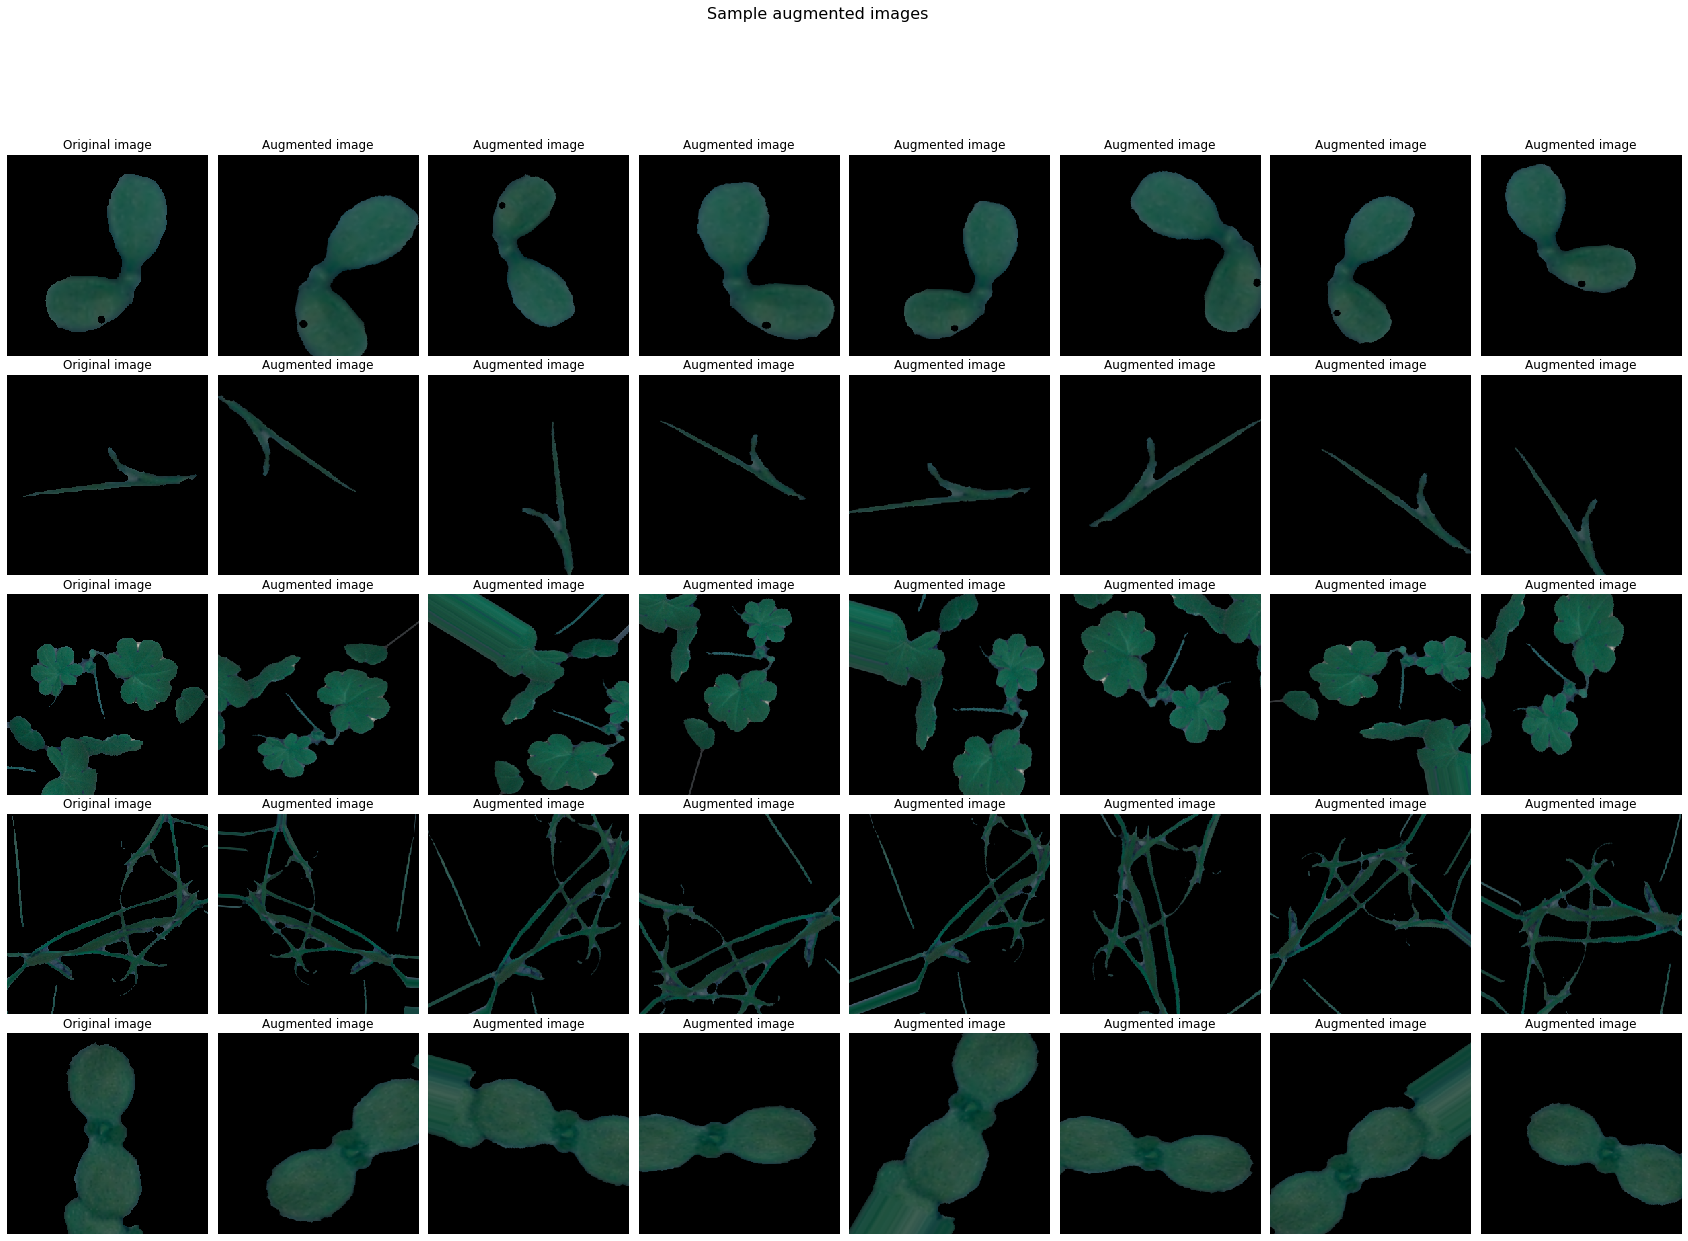

In [20]:
show_grid_with_augmented_images(number_of_samples = 5, number_of_augmentations = 7, image_data_generator = image_data_generator)

# 5. Processing

This section describes the model architecture and the training process. This are the following architectures use for training:

- Pre-trained models: This models are use for transfer learning by reusing their weights/layers and retraining the classifier on the specific problem. 
- Custom CNN: This is a multi-layer CNN using batch normalization and regularization.

Also different metrics are use to validate the model like accuracy, recall, f1-score and the confusion matrix.

The training set is divided in training (80%), validation (10%) and test sets (10%).

The NETWORK_TO_TRAIN parameter (at the beginning of the notebook) can be use to select the model to train:

- CUSTOM_CNN: Custom multi-layer CNN with FNN classifier.
- RESNET_50: Resnet_50 model with FNN classifier.
- INCEPTION_V3: InceptionV3 model with FNN classifier.

It should be easy to add additional pre-trained models.

Some additional improvements, not implemented on this notebook yet, are:

- Fine tune pre-trained models by unfreezing and training the last layers on the CNN.
- Use hyperparameters optimization using some library like hyperopt to optimize model parameters.
- Use more classifiers like XGBoost, SVM, etc. instead of just the FNN.
- Ensemble models to improve performance by combining different models.
- Use cross-validation to improve the training accuracy.

In [0]:
number_output_classes = len(get_species_groups())

In [0]:
class TrainingModel:
    accuracy_metric = {
        'training': {
            'metric': 'accuracy',
            'label': 'Accuracy'
        },
        'validation': {
            'metric': 'val_accuracy',
            'label': 'Validation accuracy'
        }
    }
    loss_metric = {
        'training': {
            'metric': 'loss',
            'label': 'Loss'
        },
        'validation': {
            'metric': 'val_loss',
            'label': 'Validation loss'
        }
    }
    
    def __init__(self, image_data_generator, base_model, classifier_model):
        self.image_data_generator = image_data_generator
        self.optimizer = Adam(lr=1e-2)
        self.loss = 'categorical_crossentropy'
        self.metrics = [TrainingModel.accuracy_metric['training']['metric']]
        self.training_results = None
        self.training_model = self.create_model(base_model, classifier_model)
        self.species_names = get_species_groups()
    
    def __del__(self):
        del self.image_data_generator
        del self.training_model
        del self.training_results
    
    def create_model(self, base_model, classifier_model):
        model = Sequential(name = "Species-Prediction-CNN")
        model.add(base_model)
        model.add(classifier_model)

        model.compile(optimizer = self.optimizer, loss = self.loss, metrics = self.metrics)  
        model.summary()

        return model

    def train_model(
        self,
        train_X,
        train_y,
        validation_data_X,
        validation_data_y,
        batch_size,
        epochs,
        steps_per_epoch,
        patience,
        class_weights
    ):
    
        self.image_data_generator.fit(train_X)
        earlystopper = EarlyStopping(monitor = 'loss', patience = patience, verbose = 1, restore_best_weights = True)
        lr_reduce = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, min_delta = 1e-5, patience = patience, verbose = 1)

        self.training_results = self.training_model.fit_generator(
            self.image_data_generator.flow(train_X, train_y, batch_size),
            epochs = epochs,
            validation_data = [validation_data_X, validation_data_y],
            steps_per_epoch = steps_per_epoch,
            callbacks = [earlystopper, lr_reduce],
            class_weight = class_weights
        )
        
    def predict(self, x):
        return self.training_model.predict(x, verbose = 1)
    
    def predict_species_class(self, x):
        return np.argmax(self.predict(x), axis = 1)
    
    def predict_species_name(self, x):
        return [self.species_names[species_class] for species_class in self.predict_species_class(x)]

    def eval_model(self, test_X, test_Y, field_name = 'species'):
        """
        Model evaluation: plots, classification report
        @param training: model training history
        @param model: trained model
        @param test_X: features 
        @param test_y: labels
        @param field_name: label name to display on plots
        """        
        test_pred = self.training_model.predict(test_X)
 
        self.plot_metrics(test_X, test_Y, test_pred, field_name)
        
        self.plot_classification_report(test_X, test_Y, test_pred)
        
        self.plot_confusion_matrix(test_Y, test_pred)
    
    def plot_metrics(self, test_X, test_y, test_pred, field_name = 'species'):
        fig, axes = plt.subplots(1, 3, figsize = (20, 7))
        
        self.plot_metric(TrainingModel.accuracy_metric, axes[0], field_name)
        self.plot_metric(TrainingModel.loss_metric, axes[1], field_name)
        self.plot_accuracy_by_species_group(test_X, test_y, test_pred, axes[2], field_name)

        plt.tight_layout()
        plt.show()
        
    def plot_metric(self, metric, axes, field_name):
        axes.plot(self.training_results.history[metric['training']['metric']], label = metric['training']['label'])
        axes.plot(self.training_results.history[metric['validation']['metric']], label = metric['validation']['label'])
        axes.set_title(f'{field_name} {metric["training"]["metric"]}')
        axes.set_xlabel('Epoch')
        axes.set_ylabel(metric['training']['label'])
        axes.legend()
 
    def plot_accuracy_by_species_group(self, test_X, test_y, test_pred, axes, field_name):
        acc_by_subspecies = np.logical_and((test_pred > 0.5), test_y).sum() / test_y.sum()
        acc_by_subspecies.plot.bar(title = f'Accuracy by {field_name}', ax = axes)
        plt.ylabel('Accuracy')
    
    def plot_classification_report(self, test_X, test_y, test_pred):
        print("Classification report")
        test_pred = np.argmax(test_pred, axis = 1)
        test_truth = np.argmax(test_y.values, axis = 1)

        print(metrics.classification_report(test_truth, test_pred, target_names = test_y.columns, zero_division = True))

        test_res = self.training_model.evaluate(test_X, test_y.values, verbose = 0)
        print('Loss function: %s, accuracy:' % test_res[0], test_res[1])
        
    def plot_confusion_matrix(self, test_Y, test_pred):
        cnf_matrix = metrics.confusion_matrix(np.argmax(test_Y.values, axis = 1), np.argmax(test_pred, axis = 1))

        abbreviation = ['Bg', 'Ch', 'Cl', 'CC', 'Cw', 'FH', 'LSb', 'M', 'SM', 'SP', 'SfC', 'Sb']
        pd.DataFrame({'class': self.species_names, 'abbreviation': abbreviation})

        fig, ax = plt.subplots(1, 1, figsize = (10, 10))
        ax = sns.heatmap(cnf_matrix, ax = ax, cmap = plt.cm.Greens, annot = True)
        ax.set_xticklabels(abbreviation)
        ax.set_yticklabels(abbreviation)
        plt.title('Confusion matrix of test set')
        plt.ylabel('True species')
        plt.xlabel('Predicted species')
        
        plt.show();

In [0]:
def split(data):
    train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 13)
    test_data, validation_data = train_test_split(test_data, test_size = 0.5, random_state = 13)

    return (train_data, validation_data, test_data)
        
def create_CNN_classifier_global_max_pooling(batch_normalization = False, dropout = False, kernel_regularizer = None):
    model = Sequential(name = 'GlobalMaxPooling-FNN-classifier')
    model.add(GlobalMaxPooling2D())
    model.add(Dense(1024, kernel_regularizer = kernel_regularizer, name = "dense1", activation='relu'))
    model.add(BatchNormalization()) if (batch_normalization) else False
    model.add(Dropout(0.5)) if (dropout) else False
    model.add(Dense(1024, kernel_regularizer = kernel_regularizer, name = "dense2", activation='relu'))
    model.add(BatchNormalization()) if (batch_normalization) else False
    model.add(Dropout(0.5)) if (dropout) else False
    model.add(Dense(number_output_classes, activation = 'softmax', name = 'predictions'))
        
    return model

def create_CNN_classifier_with_flatten(batch_normalization = False, dropout = False, kernel_regularizer = None):
    model = Sequential(name = 'Flatten-FNN-classifier')
    model.add(Flatten())
    model.add(Dense(1024, activation = "relu", kernel_regularizer = kernel_regularizer, name='dense1'))
    model.add(BatchNormalization()) if (batch_normalization) else False
    model.add(Dropout(0.5)) if (dropout) else False
    model.add(Dense(number_output_classes, activation = "softmax", name='predictions'))
    
    return model
    
def create_inceptionV3_model():
    base_model = inception_v3.InceptionV3(weights = 'imagenet', include_top = False, input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
    for layer in base_model.layers:
        layer.trainable = False

    return base_model

def create_vgg16_model():
    base_model = vgg16.VGG16(weights = 'imagenet', include_top = False, input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
    for layer in base_model.layers:
        layer.trainable = False
     
    return base_model

def create_resnet50_model():
    base_model = resnet50.ResNet50(weights = 'imagenet', include_top = False, input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
    for layer in base_model.layers:
        layer.trainable = False

    return base_model

def create_densenet201_model():
    base_model = densenet.DenseNet201(weights = 'imagenet', include_top = False, input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
    for layer in base_model.layers:
        layer.trainable = False
 
    return base_model

def create_simple_convolutional_base(batch_normalization = False):
    model = Sequential(name = 'Three-Layer-CNN-base')
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), name="conv_layer_1"))
    model.add(BatchNormalization()) if (batch_normalization) else False
    model.add(MaxPool2D(pool_size = (2, 2)))
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu', name = "conv_layer_2"))
    model.add(BatchNormalization()) if (batch_normalization) else False
    model.add(MaxPool2D(pool_size = (2, 2), strides =(2, 2)))
        
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu', name = "conv_layer_3"))
    model.add(BatchNormalization()) if (batch_normalization) else False
    model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
    
    return model
    

In [0]:
train_data, validation_data, test_data = split(all_train_df)

train_X, train_Y = load_species_images_with_segmentation(train_data, IMAGE_WIDTH, IMAGE_HEIGHT)
validation_X, validation_Y = load_species_images_with_segmentation(validation_data, IMAGE_WIDTH, IMAGE_HEIGHT)
test_X, test_Y = load_species_images_with_segmentation(test_data, IMAGE_WIDTH, IMAGE_HEIGHT)

 57%|█████▋    | 2150/3800 [22:35<37:14,  1.35s/it]

In [0]:
image_data_generator = create_image_data_generator(
    rotation_range,
    zoom_range,
    width_shift_range,
    height_shift_range,
    horizontal_flip,
    vertical_flip
)

if NETWORK_TO_TRAIN == TrainingNetwork.CUSTOM_CNN:
    base_model = create_simple_convolutional_base(batch_normalization = True)
if NETWORK_TO_TRAIN == TrainingNetwork.RESNET_50:
    base_model = create_resnet50_model()
if NETWORK_TO_TRAIN == TrainingNetwork.INCEPTION_V3:
    base_model = create_resnet50_model()

classifier_model = create_CNN_classifier_global_max_pooling(batch_normalization = True, dropout = True, kernel_regularizer = l2(0.01))
model = TrainingModel(image_data_generator, base_model, classifier_model)
model.train_model(
    train_X,
    train_Y,
    validation_X,
    validation_Y,
    batch_size,
    epochs,
    steps_per_epoch,
    patience,
    class_weights
)

In [0]:
model.eval_model(test_X, test_Y, "species")

# 6. Generate prediction file
This section generates the prediction file to upload for Kaggle.

In [0]:
def load_test():
    test = []
    files = os.listdir(TEST_DATASET_FOLDER)
    for file in tqdm(files, total = len(files)):
        test.append([f'{TEST_DATASET_FOLDER}/{file}', file])
    
    test_df = pd.DataFrame(test, columns=['filepath', 'file'])
    
    return test_df

def generate_prediction_file(model, image_width, image_height, preprocess_function = segment_plant):
    test_df = load_test()
    test_images = load_images(test_df['filepath'], image_width, image_height, preprocess_function)
    
    species_name_predictions = model.predict_species_name(np.stack(test_images))
    file_output = np.column_stack((test_df['file'], species_name_predictions))
    
    file_df = pd.DataFrame(file_output, columns = ['file', 'species'])
    file_df.to_csv("prediction_file.csv", index = False, index_label = False)
    
    return file_df

In [0]:
file_df = generate_prediction_file(model, IMAGE_WIDTH, IMAGE_HEIGHT)
file_df.head(10)

## Learnings

1. Image library: At the beginning I use skimage instead of cv2 for loading images and was not able to load the complete set of images into 16 GB RAM.
2. t-SNE improve after applying segmentation and masking over the images, but still cannot cluster correctly on lower dimensions.

# Links
- [Deep Learning using Linear Support Vector Machines](https://arxiv.org/pdf/1306.0239.pdf)
- [A New Design Based-SVM of the CNN Classifier Architecture with Dropout for Offline Arabic Handwritten Recognition](https://www.sciencedirect.com/science/article/pii/S1877050916309991)
- [Transfer learning from pre-trained models](https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751)
- [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/convolutional-networks/)
- [Regularization and Optimization strategies in Deep Convolutional Neural Network](https://arxiv.org/pdf/1712.04711.pdf)
- [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf)
- [Revisiting small batch training for deep neural networks](https://arxiv.org/pdf/1804.07612.pdf)